In [77]:
# Bad Cenario
capitalInicial = 1000
capitalFinal = -500
capitalFinal/capitalInicial, (abs((capitalFinal)/capitalInicial)**0.06599168323992045)-1

(-0.5, -0.04471155664508064)

In [79]:
capitalFinal-capitalInicial

-1500

In [74]:
(2500/1000)**0.06599168323992045

1.0623331431400154

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (40,15)

In [2]:
dt = pd.read_csv("C:/Users/johnk/Google Drive/Programming/Dados/EURUSD_Clean_20y.csv")

In [3]:
dt

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770
...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808


In [4]:
dt['time'] = pd.to_datetime(dt['time'])
dt

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770
...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808


In [5]:
x = dt.loc[dt['time'].dt.hour != dt['time'].shift().dt.hour, 'EURUSD_Open'].to_numpy()
high = dt.loc[dt['time'].dt.hour != dt['time'].shift().dt.hour, 'EURUSD_High'].to_numpy()
low = dt.loc[dt['time'].dt.hour != dt['time'].shift().dt.hour, 'EURUSD_Low'].to_numpy()

In [6]:
channel = 0.006

In [7]:
upChannels = []
upChannels.append(x[0]+(channel/2))
downChannels = []
downChannels.append(x[0]-(channel/2))
allChanels = []
allChanels.append(upChannels[0])
allChanels.append(downChannels[0])
for i in range(35):
    downChannels.append(downChannels[i]-channel)
    allChanels.append(downChannels[i])
for i in range(105):
    upChannels.append(upChannels[i]+channel)
    allChanels.append(upChannels[i])
allChanels.sort()

In [8]:
%%time
buy = np.zeros(len(x), dtype=bool)
buyPrices = []
buyIndexes = []
count = 0
for i in range(len(x)):
    if i < 1:
        continue
    for j in range(len(allChanels)):
        if x[i] > allChanels[j] and x[i-1] < allChanels[j]:
            buyPrices.append(x[i])
            buyIndexes.append(i)
            buy[i] = True
            count+=1
            break
    if buy[i] and count == 2:
        count = 0
        buy[i] = False


Wall time: 7.42 s


In [9]:
buy.sum(), len(x)

(5173, 132744)

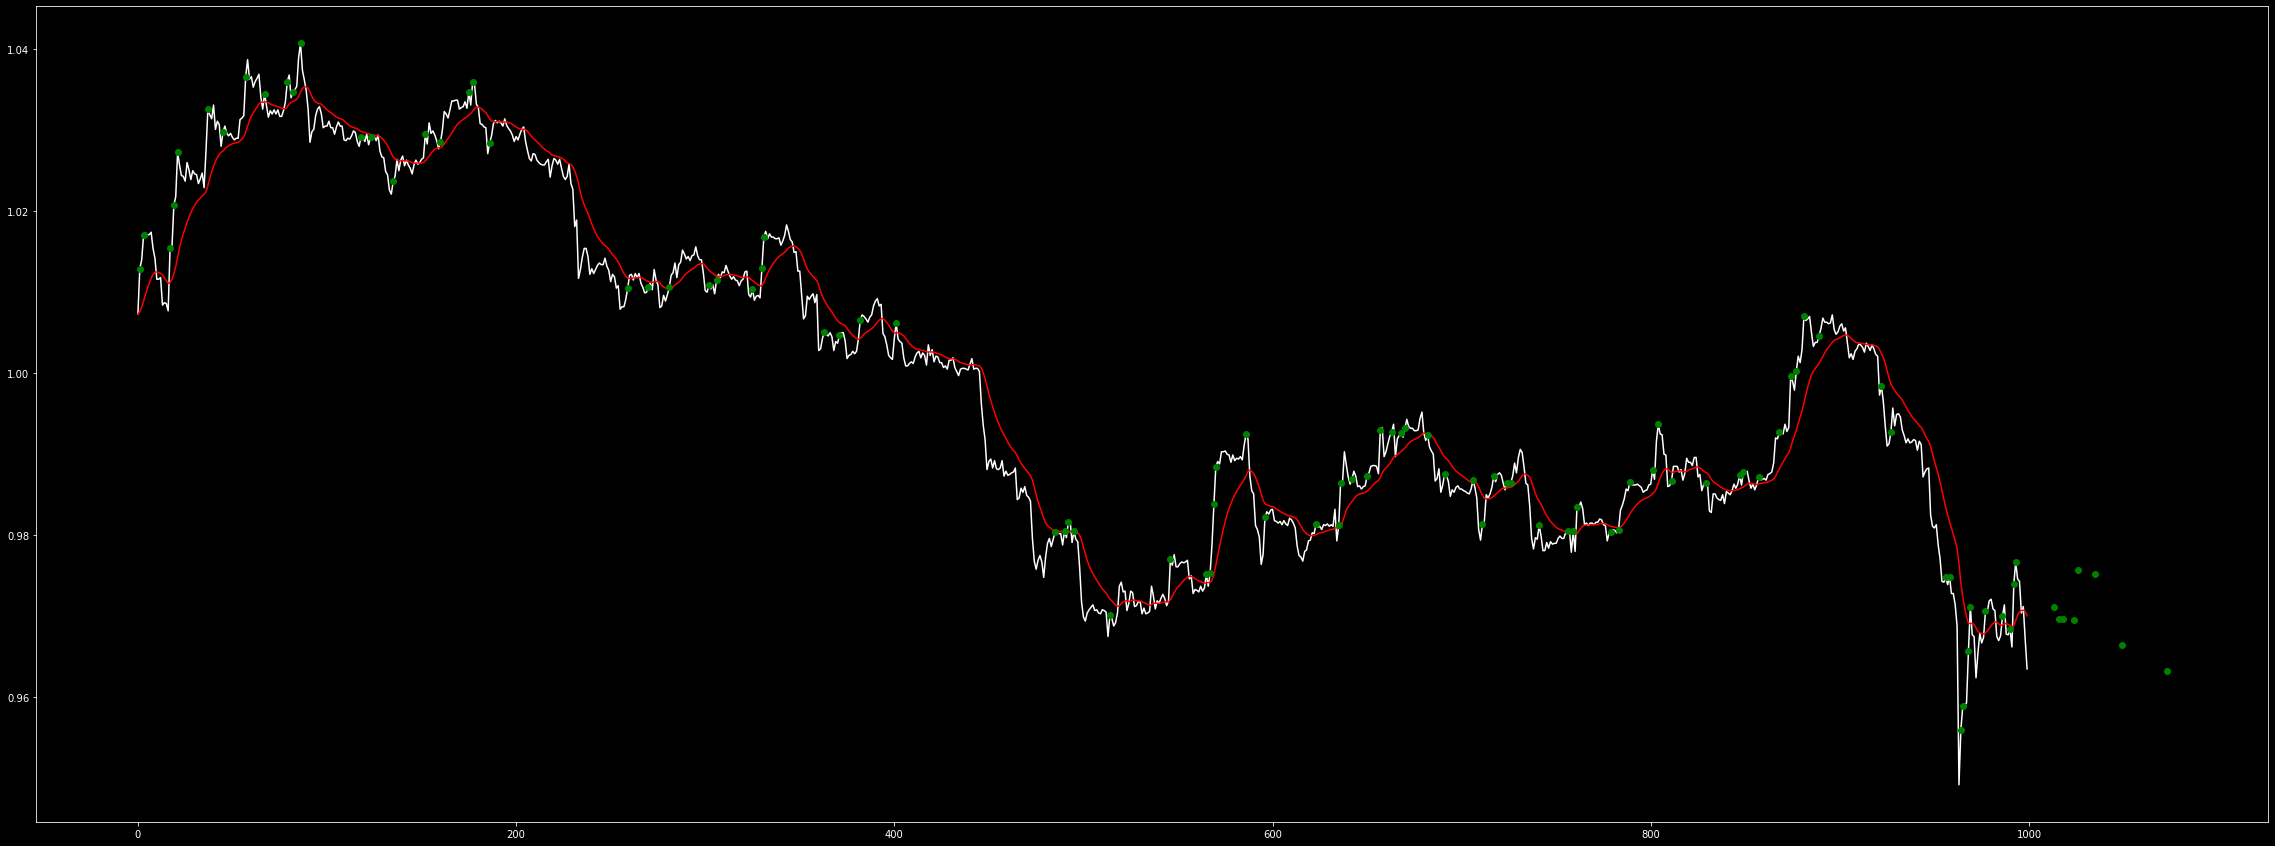

In [14]:
plt.plot(x[:1000], color="w")
plt.plot(decycle1[:1000], color="red")
plt.plot(buyIndexes[:100], buyPrices[:100], 'o', color="g")
#plt.hlines(allChanels, xmin=0, xmax=len(x))
plt.show()

Faço um loop comaprando o preço com cada nivel  
Se o preço ultrapassou o nivel  
- Flag buy/sell true  
- Salvo os valores do tpsl na struct  

Eu posso tanto color um take profit fixo, exemplo cruzou canal tp em 2 canais acima  
ou em vez de usar take profit, eu movimentar meu stop loss  

Em vez de calcular todos os canais de uma vez, posso ir calculando conforme vai coorrendo o backtest  

if alguma coisa
    canalAcima = canalAcima +- tamanhoCanal  
    canalAbaixo = canalAbaixo +- tamanhoCanal  

In [11]:
def decycler(price, cutoff):
    alpha1 = (math.cos(math.radians(360 / cutoff)) + math.sin(math.radians(360 / cutoff))-1)/math.cos(math.radians(360 / cutoff))
    decycle = np.zeros(price.size)

    for i, _ in enumerate(price):
        if i < 1:
            decycle[i] = price[i]
            continue
        decycle[i] = (alpha1/2)*(price[i]+price[i-1])+(1-alpha1)*decycle[i-1]
    
    return decycle

In [12]:
decycle1 = decycler(x, 60)
np.round(decycle1, 5)

array([1.0073 , 1.00758, 1.00816, ..., 1.22025, 1.22002, 1.21985])

In [8]:
decycle2 = decycler(x, 360)
decycle2

array([1.0073    , 1.00734845, 1.00745402, ..., 1.21890041, 1.2188831 ,
       1.21887396])

'\nDeve ser usado como uma linha de tendencia\nEm um decycler de cutoff 30 eu teria quase uma sma de 8 periodos\nsem o lag de 8 periodos, apenas de 1\nAo que parece há poucos cruzamentos falsos\nPossiveis estrategias\nCruzamento\n    - Se ate o candle x, ela não caiu/subiu apenas, sair do trade\nver +/- quantidades de trades para implemetnar essa logica\n\n'

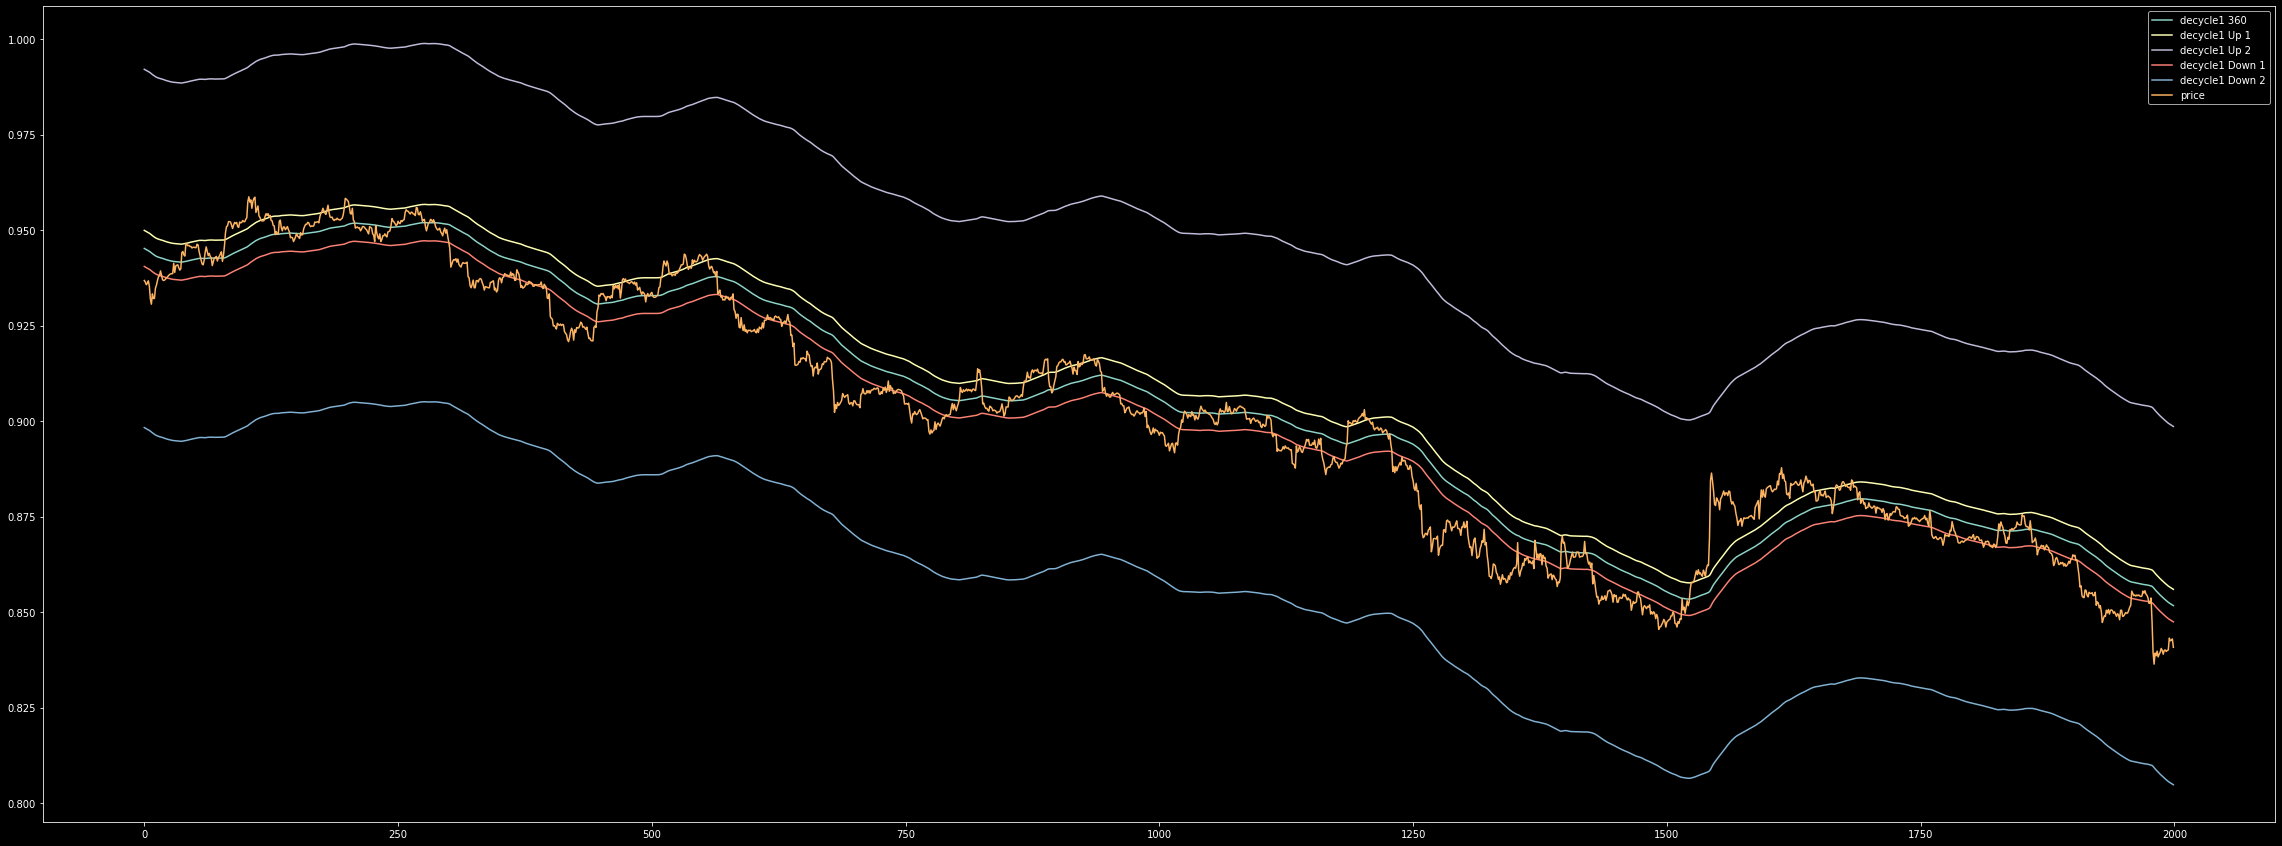

In [69]:
plt.plot(decycle2[3000:5000], label='decycle1 360')
plt.plot(decycle2[3000:5000] * 1.005, label='decycle1 Up 1')
plt.plot(decycle2[3000:5000] + (decycle2[3000:5000].std()*1.5), label='decycle1 Up 2')
plt.plot(decycle2[3000:5000] * 0.995, label='decycle1 Down 1')
plt.plot(decycle2[3000:5000] - (decycle2[3000:5000].std()*1.5), label='decycle1 Down 2')
#plt.plot(decycle2[3000:4500], label='decycle2 360')
plt.plot(x[3000:5000], label='price')
plt.legend()
"""
Deve ser usado como uma linha de tendencia
Em um decycler de cutoff 30 eu teria quase uma sma de 8 periodos
sem o lag de 8 periodos, apenas de 1
Ao que parece há poucos cruzamentos falsos
Possiveis estrategias
Cruzamento
    - Se ate o candle x, ela não caiu/subiu apenas, sair do trade
ver +/- quantidades de trades para implemetnar essa logica

"""

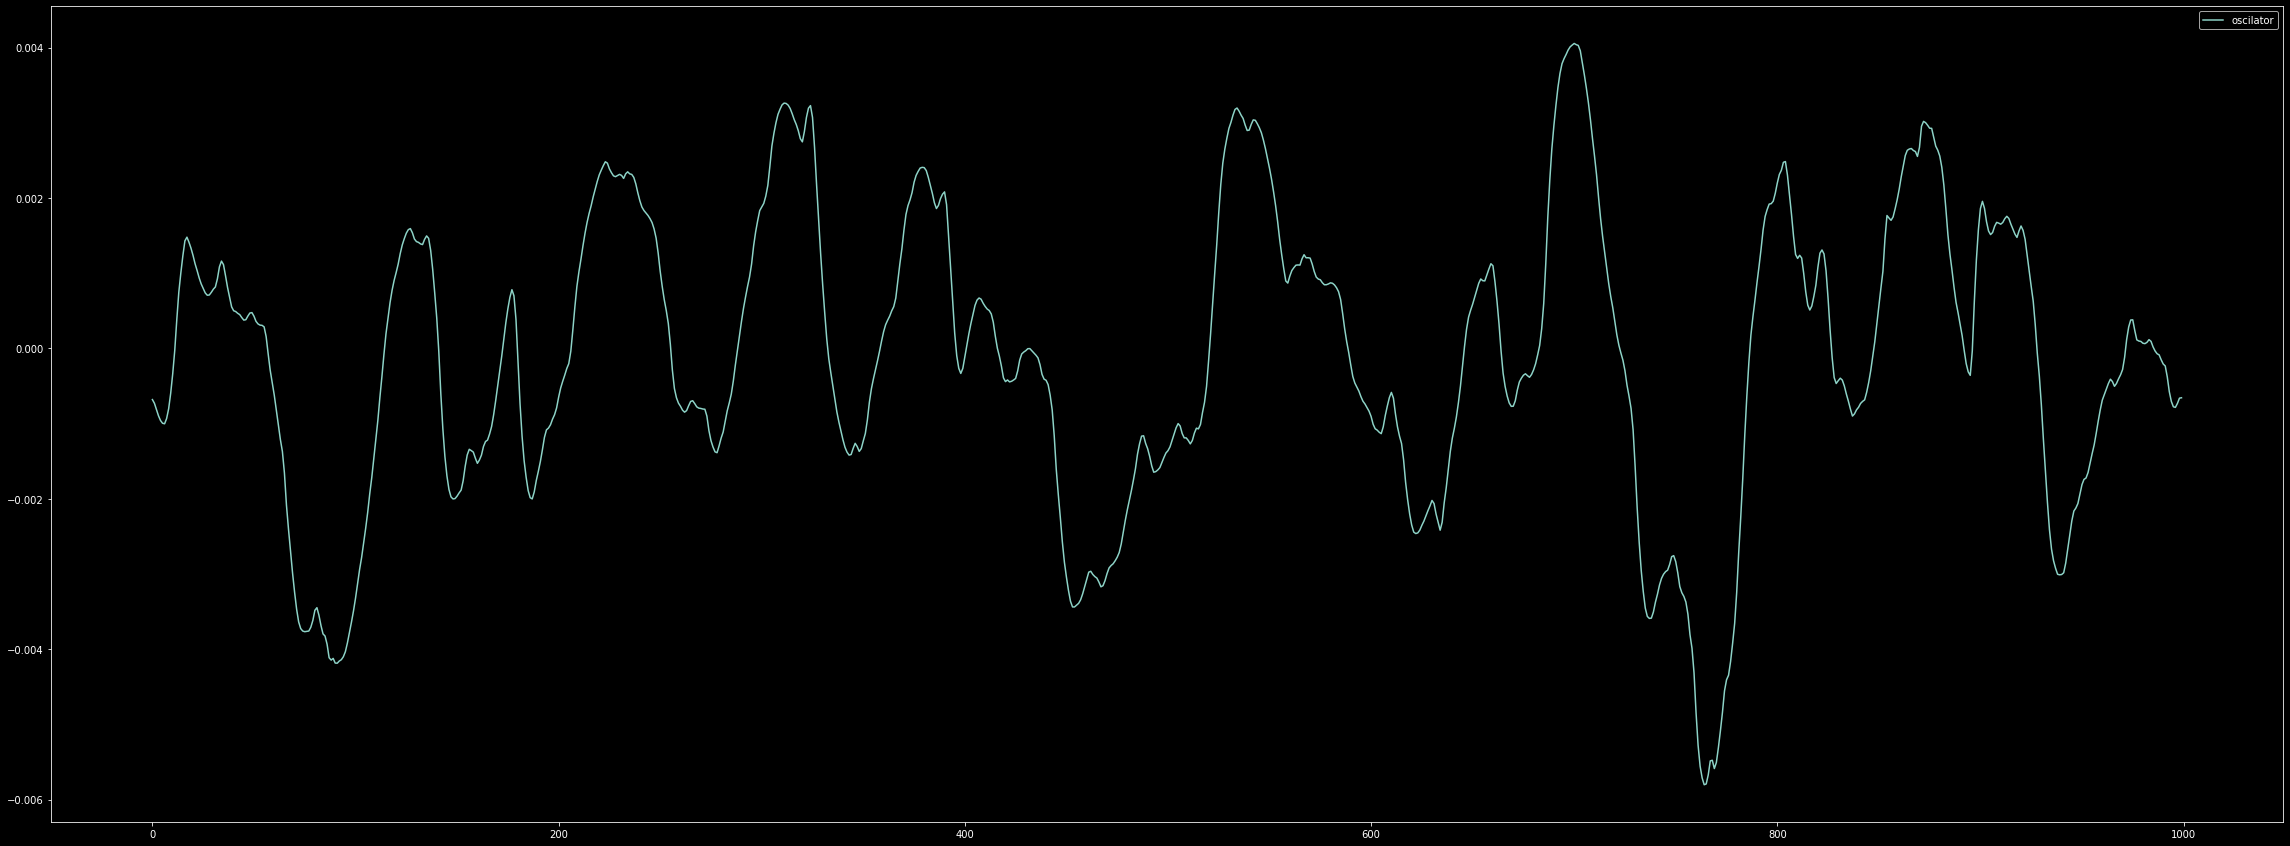

In [19]:
plt.plot(decycleosc1[3500:4500], label='oscilator')
plt.legend()

In [10]:
def decyclerOsc(price, hpperiod1, hpperiod2):
    alpha1 = (math.cos(math.radians(.707*360 / hpperiod1)) + math.sin(math.radians(.707*360 / hpperiod1))-1)/math.cos(math.radians(.707*360 / hpperiod1))
    alpha2 = (math.cos(math.radians(.707*360 / hpperiod2)) + math.sin(math.radians(.707*360 / hpperiod2))-1)/math.cos(math.radians(.707*360 / hpperiod2))
    hp1 = np.zeros(price.size)
    hp2 = np.zeros(price.size)
    decycle = np.zeros(price.size)
    

    for i, _ in enumerate(price):
        if i < 2:
            hp1[i] = price[i]
            hp2[i] = price[i]
            continue
        hp1[i] = (1-alpha1/2)*(1-alpha1/2)*(price[i]-2*price[i-1]+price[i-2])+2*(1-alpha1)*hp1[i-1]-(1-alpha1)*(1-alpha1)*hp1[i-2]
        hp2[i] = (1-alpha2/2)*(1-alpha2/2)*(price[i]-2*price[i-1]+price[i-2])+2*(1-alpha2)*hp2[i-1]-(1-alpha2)*(1-alpha2)*hp2[i-2]
        
        decycle[i] = hp2[i]-hp1[i]
    
    return decycle

In [53]:
def bandPassFilter(price, period, bandwidth):
    alpha2 = (math.cos(math.radians(.25*bandwidth*360/period)) + math.sin(math.radians(.25*bandwidth*360/period))-1)/math.cos(math.radians(.25*bandwidth*360/period))
    beta1 = math.cos(math.radians(360/period))
    gamma1 = 1 / math.cos(math.radians(360*bandwidth/period))
    alpha1 = gamma1-math.sqrt(gamma1*gamma1-1)
    hp = np.zeros(price.size)
    bp = np.zeros(price.size)
    peak = np.zeros(price.size)
    signal = np.zeros(price.size)
    

    for i, _ in enumerate(price):
        if i < 1:
            hp[i] = price[i]
            continue
        hp[i] = (1+alpha2/2)*(price[i]-price[i-1])+(1-alpha2)*hp[i-1]
        
        if i < 2:
            continue
        
        bp[i] = .5*(1-alpha1)*(hp[i]-hp[i-2])+beta1*(1+alpha1)*bp[i-1]-alpha1*bp[i-2]
        
        peak[i] = .991*peak[i-1]
        if abs(bp[i]) > peak[i]:
            peak[i] = abs(bp[i])
    
        if peak[i] != 0:
            signal[i] = bp[i] / peak[i]
            
    return peak

In [73]:
decycleosc1 = decyclerOsc(x, 300, 20)
decycleosc1

array([ 0.        ,  0.        , -0.0416287 , ...,  0.00478425,
        0.00479666,  0.00459183])

In [71]:
decycleosc2 = decyclerOsc(x, 270, 300)
decycleosc2

array([0.00000000e+00, 0.00000000e+00, 6.15237447e-05, ...,
       7.83239993e-05, 6.36108300e-05, 5.08292202e-05])

In [54]:
bandpass1 = bandPassFilter(x, 20, .7)
bandpass1

array([0.        , 0.        , 0.00977987, ..., 0.00163857, 0.00162382,
       0.0016092 ])

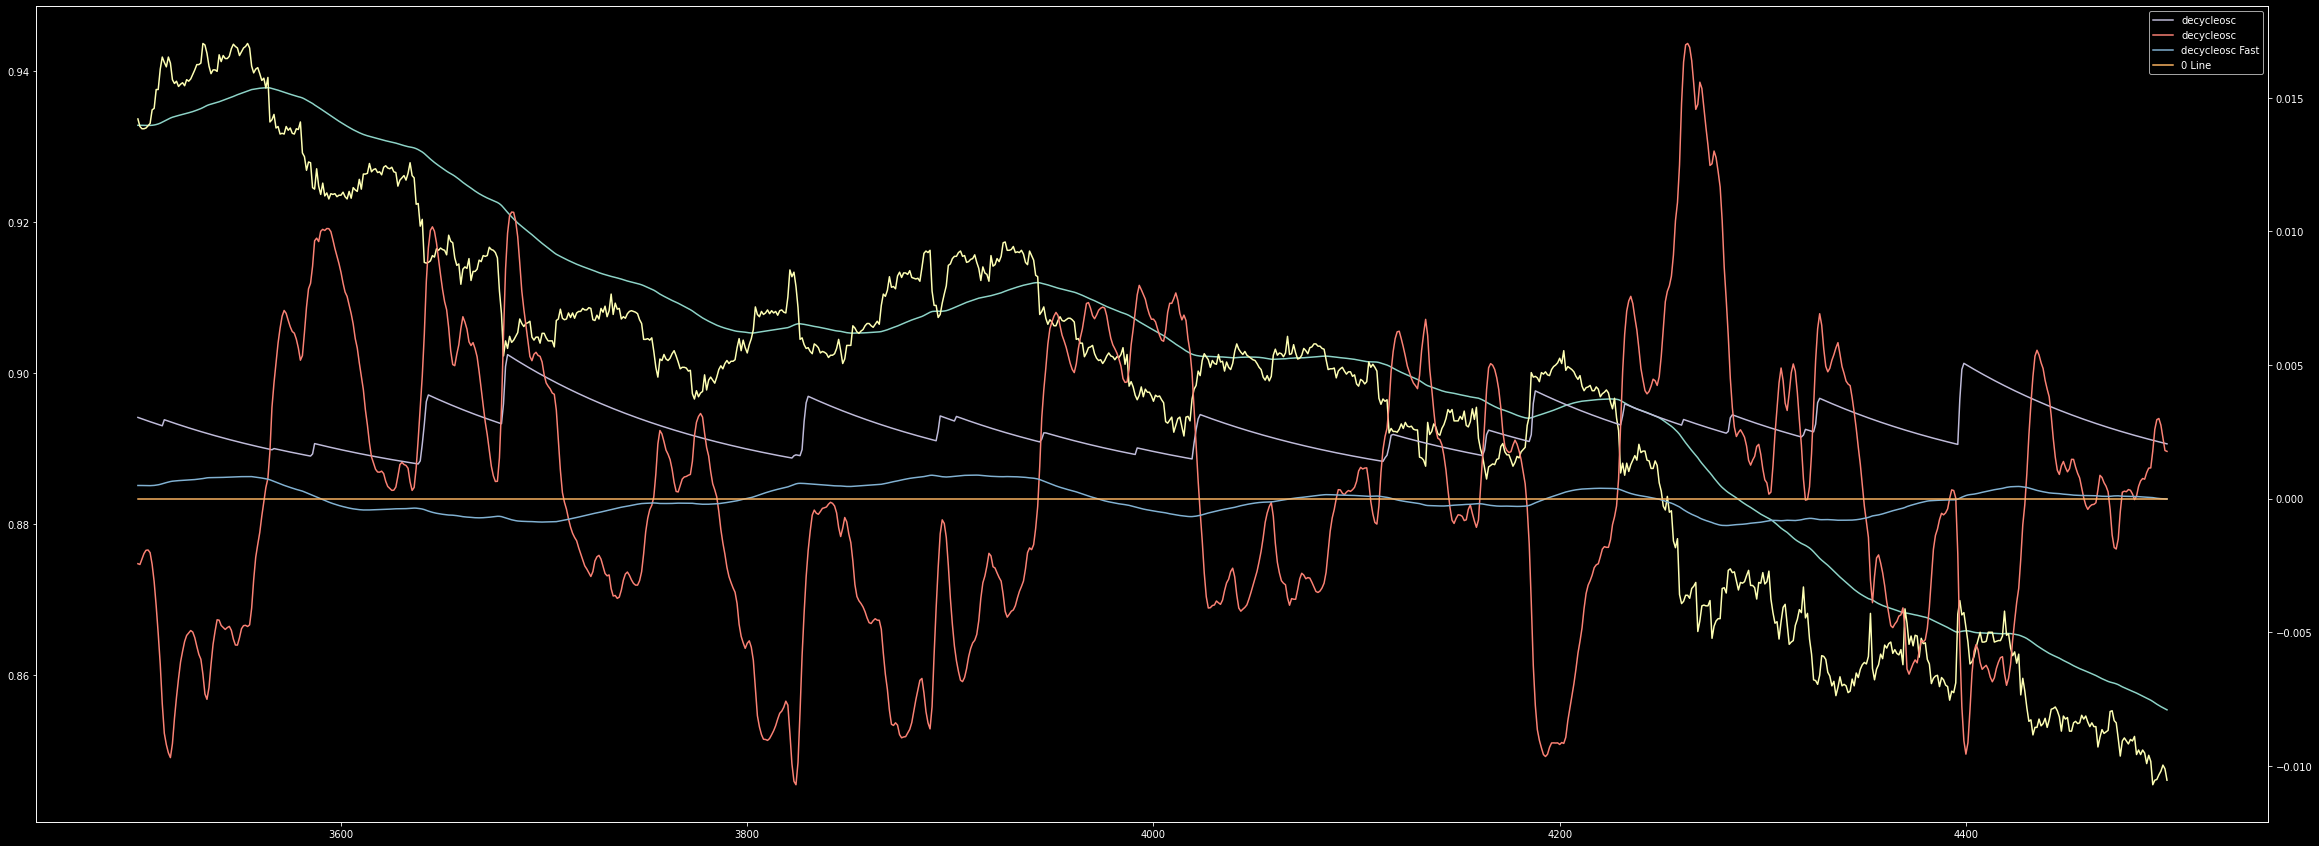

In [74]:
start = 3500
end = 4500
pd.Series(decycle2)[start:end].plot(label='decycle3')
#pd.Series(decycle4)[start:end].plot(label='decycle4')
pd.Series(x)[start:end].plot(label='price')
#pd.Series(high)[start:end].plot(label='high')
#pd.Series(low)[start:end].plot(label='low')
pd.Series(bandpass1)[start:end].plot(label='decycleosc', secondary_y=True)
pd.Series(decycleosc1)[start:end].plot(label='decycleosc', secondary_y=True)
pd.Series(decycleosc2)[start:end].plot(label='decycleosc Fast', secondary_y=True)
pd.Series(np.zeros(5000))[start:end].plot(secondary_y=True, label='0 Line')
plt.legend()
plt.show()
# A decycler oscillator shows transitions between uptrends and downtrends at the zero crossings.

In [13]:
decycle3 = decycler(x, 30)
decycle3

array([1.0073    , 1.0078326 , 1.00890112, ..., 1.21917501, 1.21893248,
       1.21882264])

In [14]:
decycle4 = decycler(x, 60)
decycle4

array([1.0073    , 1.00757887, 1.00816361, ..., 1.22025431, 1.22001983,
       1.21985402])

Total Trades Possible: 67260
Total Trades Possible per Day: 13.452
Check Sisze 2691
Trade Median: 0.0015000000000000568
Trade Mean: -4.9669267930137164e-05


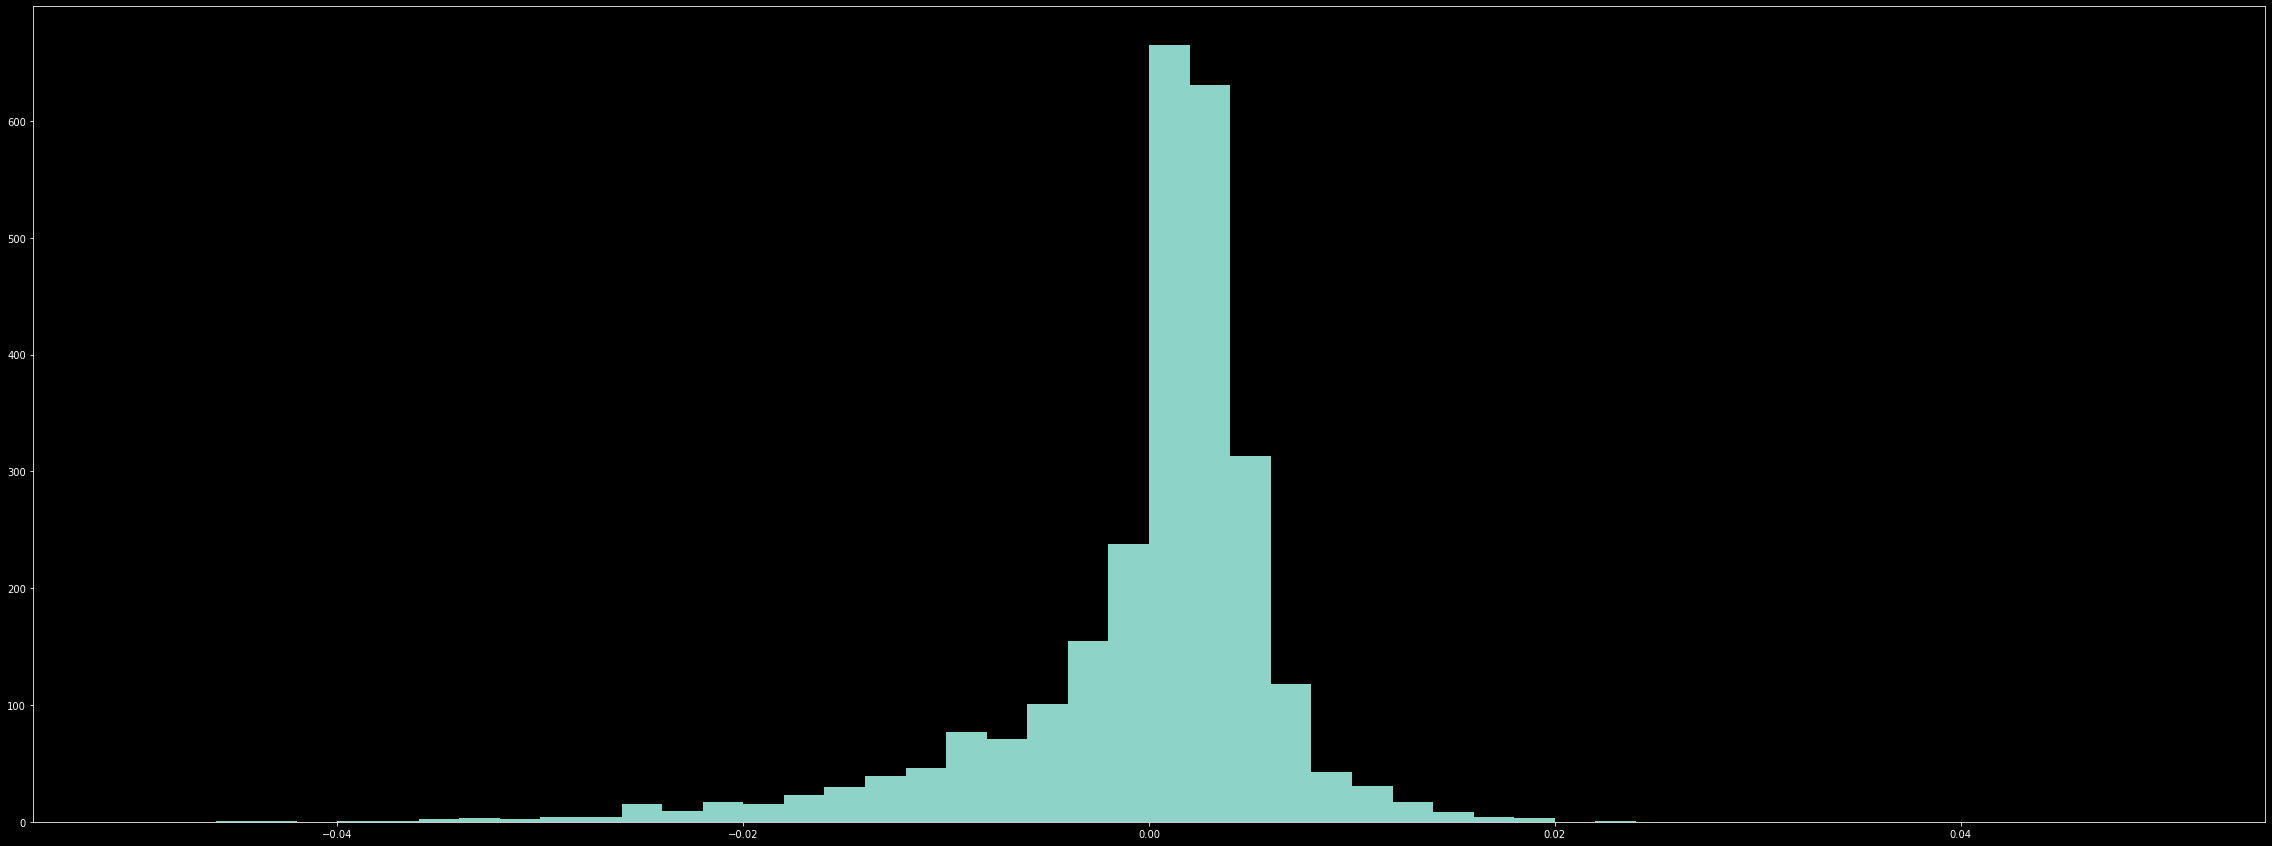

In [77]:
buy, buy.sum(), buy.sum() / (20*250)
buy = np.zeros(x.size, dtype=np.bool_)
check = np.zeros(x.size)
initPrice = 0.
countFlag = False
for i, _ in enumerate(x):
    if i < 1: continue
    if decycle3[i] > decycle4[i]:
        buy[i] = True
    if decycle3[i] > decycle4[i] and not countFlag:
        # initPrice e apra ver a distribuição entre uma compra e uma venda
        countFlag = True
        initPrice = x[i]
    elif decycle3[i] < decycle4[i] and countFlag:
        countFlag = False
        check[i] = initPrice - x[i]
        initPrice = 0.
check = np.delete(check, np.where(check == 0.))
print(f"Total Trades Possible: {buy.sum()}")
print(f"Total Trades Possible per Day: {buy.sum()/ (20*250)}")
print(f"Check Sisze {check.size}")
print(f"Trade Median: {np.median(check)}")
print(f"Trade Mean: {np.mean(check)}")
plt.hist(check, bins=50, range=(-0.05, 0.05))
plt.show()

Total Trades Possible: 2702
Total Trades Possible per Day: 0.5404
Check Sisze 2690
Trade Median: 0.0015000000000000568
Trade Mean: -5.128624535315951e-05


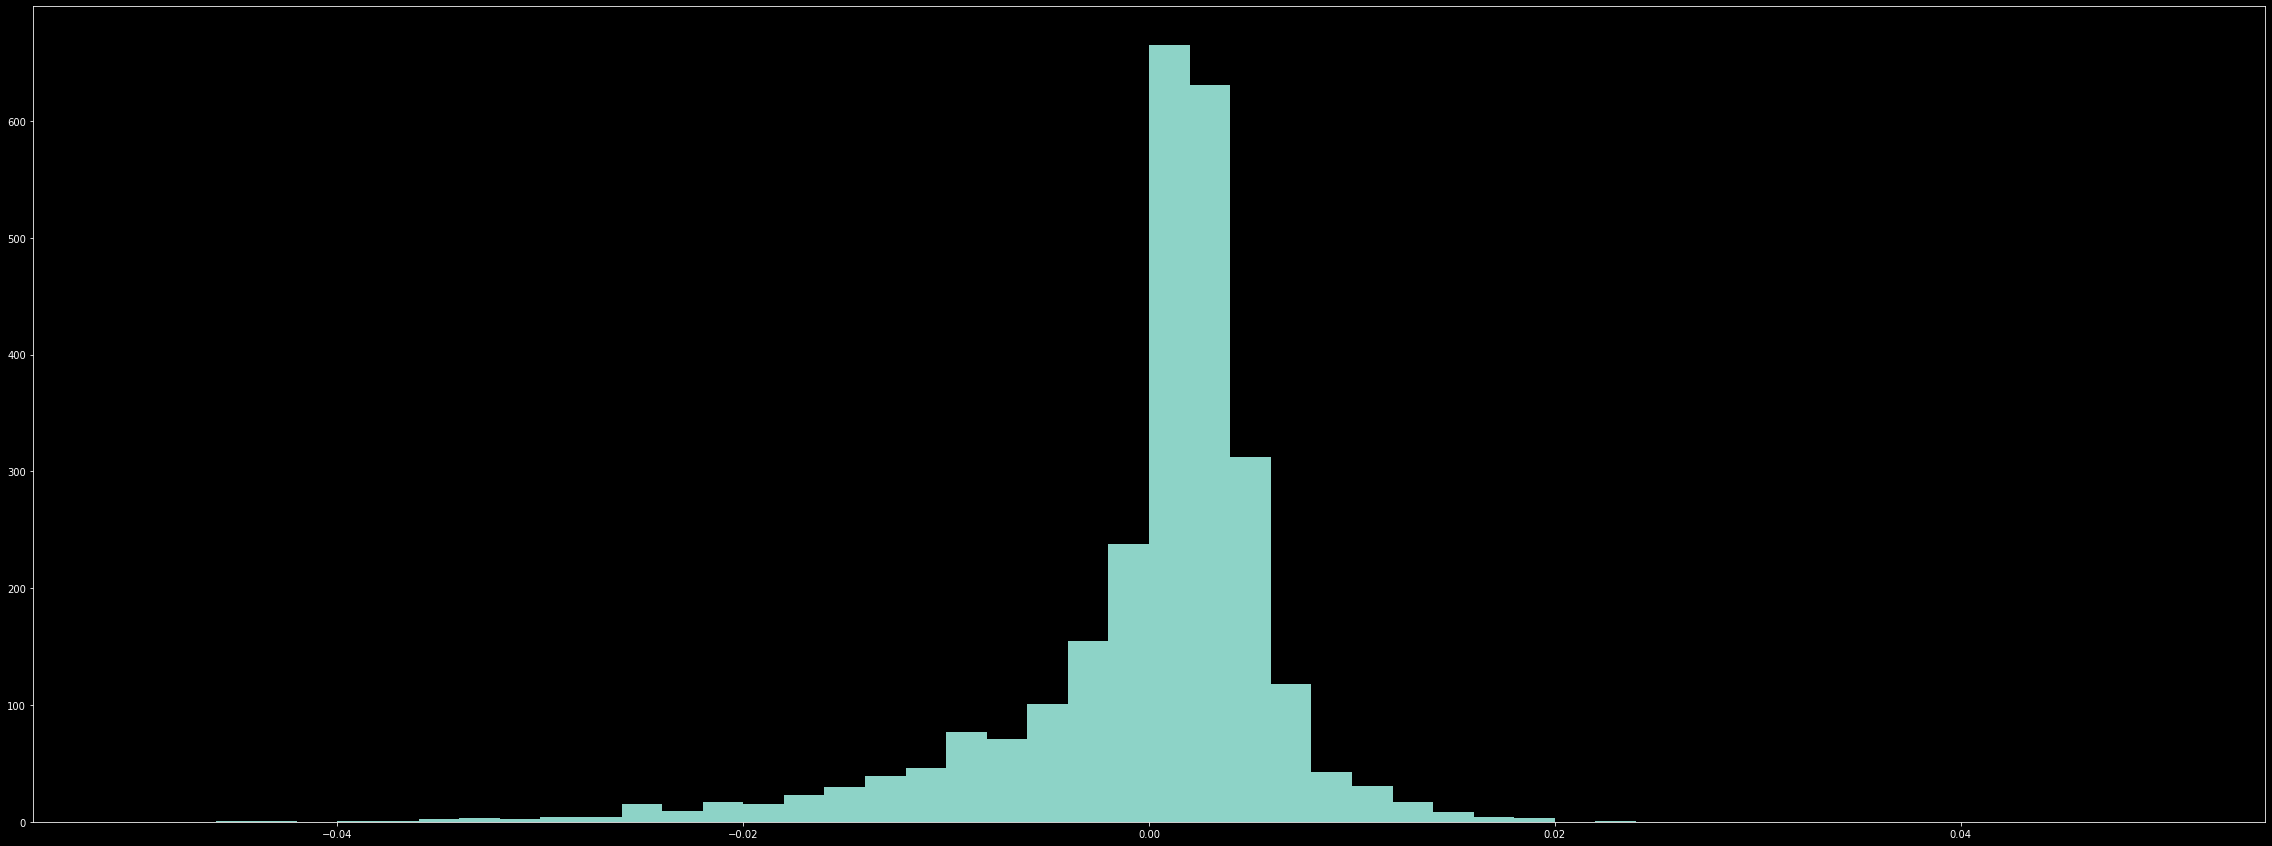

In [76]:
buy = np.zeros(x.size, dtype=np.bool_)
check = np.zeros(x.size)
initPrice = 0.
countFlag = False
for i, _ in enumerate(x):
    if i < 1: continue
    if decycle3[i] > decycle4[i] and decycle3[i-1] < decycle4[i-1]:
        buy[i] = True
    if decycle3[i] > decycle4[i] and decycle3[i-1] < decycle4[i-1] and not countFlag:
        countFlag = True
        initPrice = x[i]
    elif decycle3[i] < decycle4[i] and decycle3[i-1] > decycle4[i-1] and countFlag:
        countFlag = False
        check[i] = initPrice - x[i]
        initPrice = 0.
check = np.delete(check, np.where(check == 0.))
print(f"Total Trades Possible: {buy.sum()}")
print(f"Total Trades Possible per Day: {buy.sum()/ (20*250)}")
print(f"Check Sisze {check.size}")
print(f"Trade Median: {np.median(check)}")
print(f"Trade Mean: {np.mean(check)}")
plt.hist(check, bins=50, range=(-0.05, 0.05))
plt.show()

Total Trades Possible: 1260
Total Trades Possible per Day: 0.252
Check Sisze 865
Trade Median: 0.0020000000000000018
Trade Mean: -0.0005147514450867016


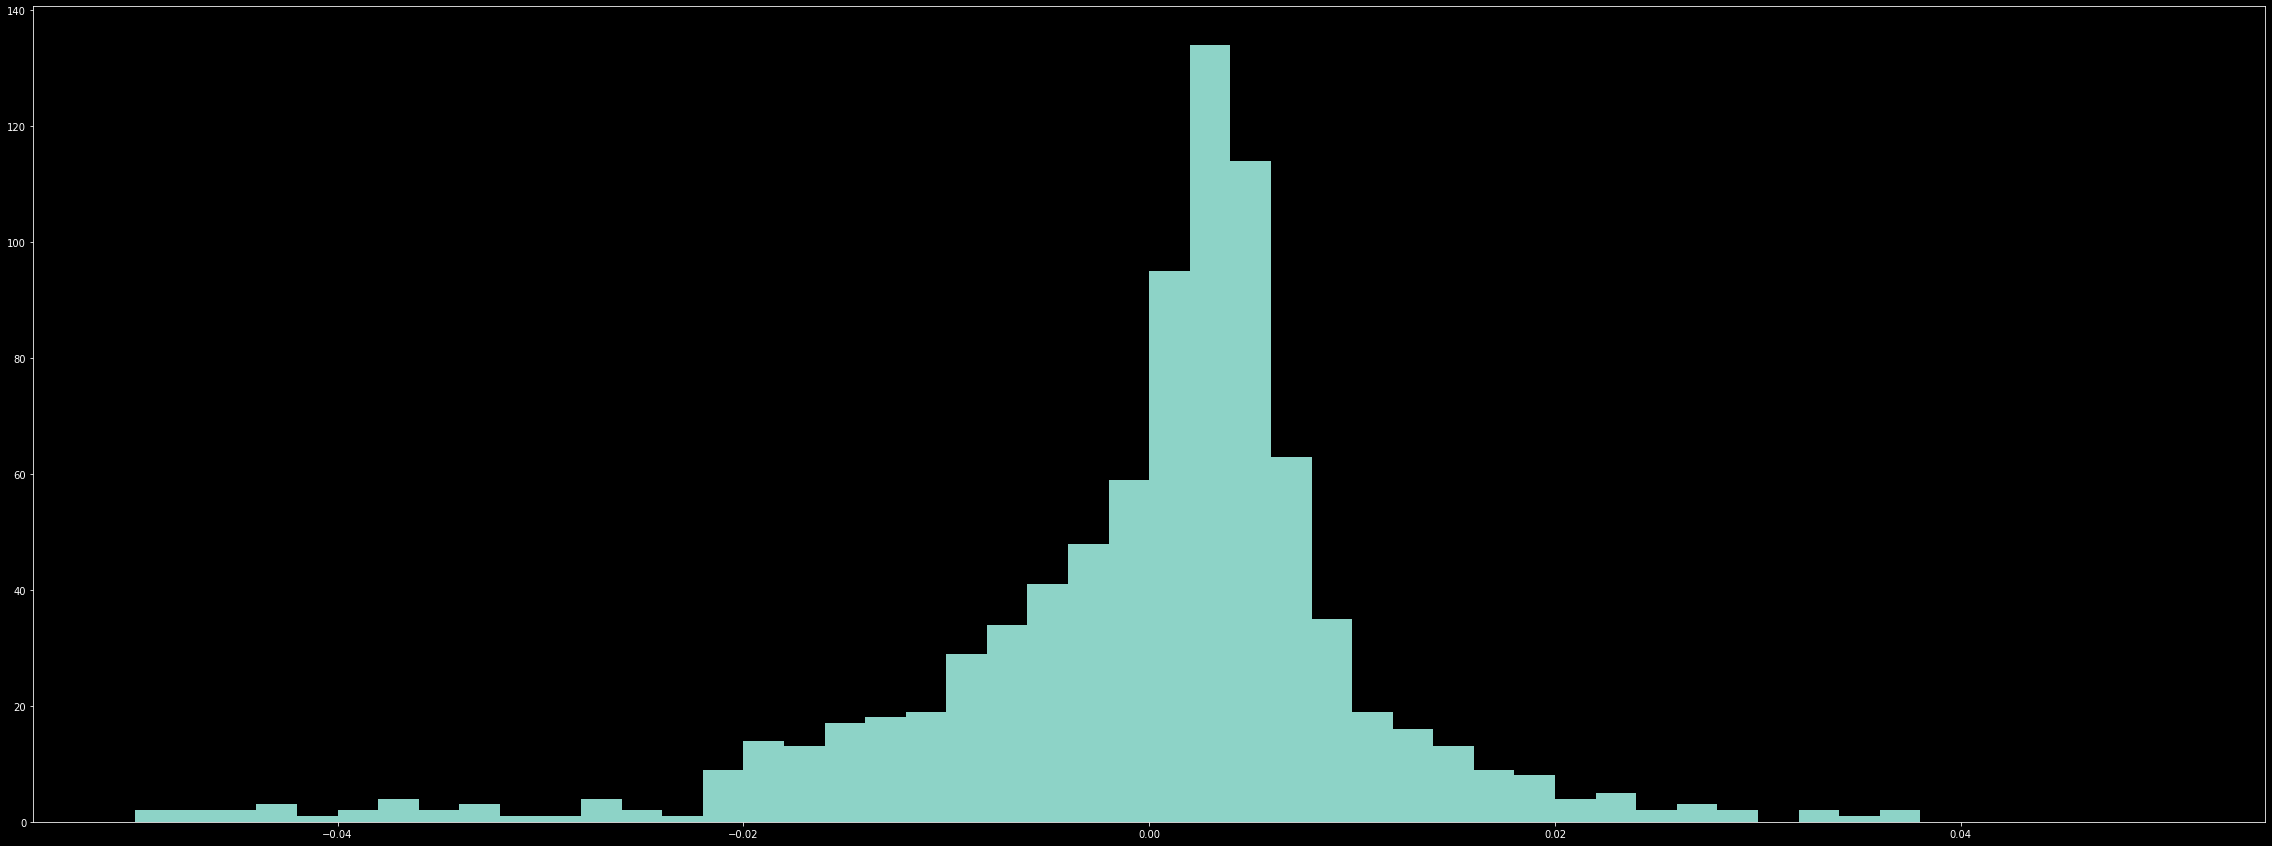

In [71]:
buy = np.zeros(x.size, dtype=np.bool_)
check = np.zeros(x.size)
initPrice = 0.
countFlag = False
for i, _ in enumerate(x):
    if i < 1: continue
    if decycle3[i] > decycle4[i] and decycleosc1[i] > 0 and decycleosc1[i-1] < 0:
        buy[i] = True
    if decycle3[i] > decycle4[i] and decycleosc1[i] > 0 and decycleosc1[i-1] < 0 and not countFlag:
        countFlag = True
        initPrice = x[i]
    elif decycle3[i] < decycle4[i] and decycleosc1[i] < 0 and decycleosc1[i-1] > 0 and countFlag:
        countFlag = False
        check[i] = initPrice - x[i]
        initPrice = 0.
check = np.delete(check, np.where(check == 0.))
print(f"Total Trades Possible: {buy.sum()}")
print(f"Total Trades Possible per Day: {buy.sum()/ (20*250)}")
print(f"Check Sisze {check.size}")
print(f"Trade Median: {np.median(check)}")
print(f"Trade Mean: {np.mean(check)}")
plt.hist(check, bins=50, range=(-0.05, 0.05))
plt.show()

In [68]:
check

array([-1.0086 , -1.0077 , -1.0154 , ..., -1.21766, -1.21814, -1.21857])

Total Trades Possible: 54588
Total Trades Possible per Day: 10.9176
Check Sisze 2691
Trade Median: 0.0015000000000000568
Trade Mean: -4.9669267930137164e-05


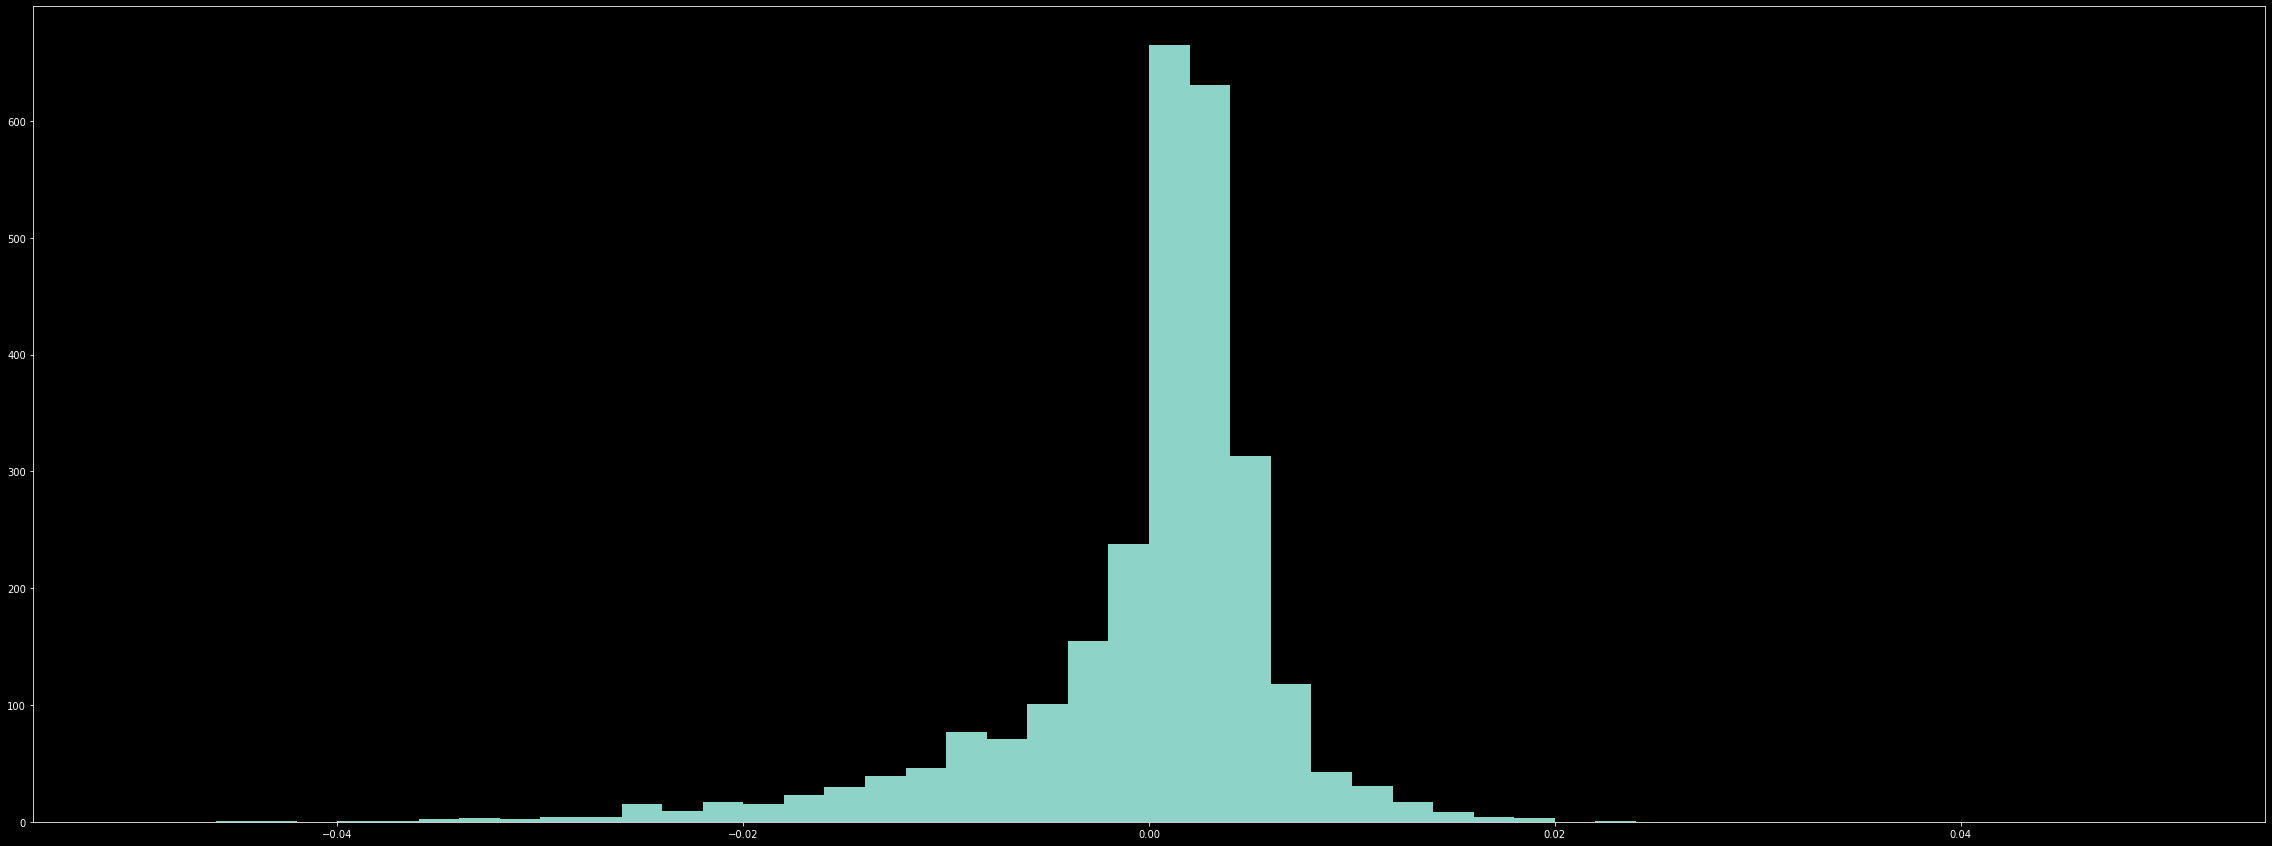

In [70]:
buy = np.zeros(x.size, dtype=np.bool_)
check = np.zeros(x.size)
initPrice = 0.
countFlag = False
for i, _ in enumerate(x):
    if decycle3[i] > decycle4[i] and decycleosc1[i] > 0:
        buy[i] = True
    if decycle3[i] > decycle4[i] and not countFlag:
        countFlag = True
        initPrice = x[i]
    elif decycle3[i] < decycle4[i] and countFlag:
        countFlag = False
        check[i] = initPrice - x[i]
        initPrice = 0.
check = np.delete(check, np.where(check == 0.))
print(f"Total Trades Possible: {buy.sum()}")
print(f"Total Trades Possible per Day: {buy.sum()/ (20*250)}")
print(f"Check Sisze {check.size}")
print(f"Trade Median: {np.median(check)}")
print(f"Trade Mean: {np.mean(check)}")
plt.hist(check, bins=50, range=(-0.05, 0.05))
plt.show()

In [93]:
decycleosc2[-10:]

array([-8.19803467e-05, -4.17434006e-04, -7.38795725e-04, -9.64970567e-04,
       -1.21607788e-03, -1.41731760e-03, -1.68066185e-03, -1.83025345e-03,
       -1.77870079e-03, -1.63417308e-03])